In [1]:
import sys
#!{sys.executable} -m pip install pymongo
#!{sys.executable} -m pip install pyyaml
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install scipy
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install isoweek

#!{sys.executable} -m pip install rpy2

In [2]:

import os
print(os.getcwd())
# Get Mongo database
from yaml import load
from pymongo import MongoClient
from getsecret import getsecret

client = MongoClient(getsecret("MONGODB_URI"))
db = client[getsecret("MOBILE_NAME")]
ext_client = MongoClient(getsecret("EXT_URI"))

ext_db = ext_client[getsecret("DB_NAME")]
# Get all synced accounts and their respective users.
import urllib.request as req
import json
accounts = json.loads(req.urlopen("http://localhost:5000/synced_emails").read().decode("utf-8"))


### CONSTANTS ###
INTENSITY = "intensity"
TOTAL_TIME = "total_time"
ANDROID = "android"
HASH = "email_hash"
INSTALL = "install_id"
GOALS = "goals"
FREQ_GOALS = "freq_goals"
INFREQ_GOALS = "infreq_goals"
OTHER_TIME = "other_time"
FREQ_TIME ="freq_time"
GOAL_TIME = "goal_time"
TARGET_TIME = "target_time"
BROWSER = "browser"
BROWSER_DOMAIN = "browser_domain"
GOAL_TIMES = "goal_frequency_days"
FREQ_GOALS = "freq_goals"
INFREQ_GOALS = "infreq_goals"
BROWSER = "browser"
FREQUENCY = "frequency"
TIME = "time"
GOAL = "goal"
SPEND_LESS_TIME_LENGTH = len("custom/spend_less_time_")
AVG_FREQ_TIME = "avg_freq_time"
AVG_INFREQ_TIME = "avg_infreq_time"
AVG_GOAL_TIME = "avg_goal_time"
UNPRODUCTIVE_TIME = "unproductive_time"
PRODUCTIVE_TIME = "productive_time"
INFREQ_TIME = "infreq_time"
NUM_FREQ_GOALS = "num_freq_goals"
NUM_INFREQ_GOALS = "num_infreq_goals"
import time


### FUNCTIONS ###
# Get freq stats
# week -> goal -> freq
# Top-level-domain-names that are not pertinent to the application.
TLDs = ['aaa', 'abb', 'abc', 'ac', 'aco', 'ad', 'ads', 'ae', 'aeg', 'af', 'afl', 'ag', 'ai', 'aig', 'al', 'am', 'anz', 'ao', 'aol', 'app', 'aq', 'ar', 'art', 'as', 'at', 'au', 'aw', 'aws', 'ax', 'axa', 'az', 'ba', 'bar', 'bb', 'bbc', 'bbt', 'bcg', 'bcn', 'bd', 'be', 'bet', 'bf', 'bg', 'bh', 'bi', 'bid', 'bio', 'biz', 'bj', 'bm', 'bms', 'bmw', 'bn', 'bnl', 'bo', 'bom', 'boo', 'bot', 'box', 'br', 'bs', 'bt', 'buy', 'bv', 'bw', 'by', 'bz', 'bzh', 'ca', 'cab', 'cal', 'cam', 'car', 'cat', 'cba', 'cbn', 'cbs', 'cc', 'cd', 'ceb', 'ceo', 'cf', 'cfa', 'cfd', 'cg', 'ch', 'ci', 'ck', 'cl', 'cm', 'cn', 'co', 'com', 'cr', 'crs', 'csc', 'cu', 'cv', 'cw', 'cx', 'cy', 'cz', 'dad', 'day', 'dds', 'de', 'dev', 'dhl', 'diy', 'dj', 'dk', 'dm', 'dnp', 'do', 'dog', 'dot', 'dtv', 'dvr', 'dz', 'eat', 'ec', 'eco', 'edu', 'ee', 'eg', 'er', 'es', 'esq', 'et', 'eu', 'eus', 'fan', 'fi', 'fit', 'fj', 'fk', 'fly', 'fm', 'fo', 'foo', 'fox', 'fr', 'frl', 'ftr', 'fun', 'fyi', 'ga', 'gal', 'gap', 'gb', 'gd', 'gdn', 'ge', 'gea', 'gf', 'gg', 'gh', 'gi', 'gl', 'gle', 'gm', 'gmo', 'gmx', 'gn', 'goo', 'gop', 'got', 'gov', 'gp', 'gq', 'gr', 'gs', 'gt', 'gu', 'gw', 'gy', 'hbo', 'hiv', 'hk', 'hkt', 'hm', 'hn', 'hot', 'how', 'hr', 'ht', 'hu', 'ibm', 'ice', 'icu', 'id', 'ie', 'ifm', 'il', 'im', 'in', 'inc', 'ing', 'ink', 'int', 'io', 'iq', 'ir', 'is', 'ist', 'it', 'itv', 'jcb', 'jcp', 'je', 'jio', 'jlc', 'jll', 'jm', 'jmp', 'jnj', 'jo', 'jot', 'joy', 'jp', 'ke', 'kfh', 'kg', 'kh', 'ki', 'kia', 'kim', 'km', 'kn', 'kp', 'kpn', 'kr', 'krd', 'kw', 'ky', 'kz', 'la', 'lat', 'law', 'lb', 'lc', 'lds', 'li', 'lk', 'llc', 'lol', 'lpl', 'lr', 'ls', 'lt', 'ltd', 'lu', 'lv', 'ly', 'ma', 'man', 'map', 'mba', 'mc', 'md', 'me', 'med', 'men', 'mg', 'mh', 'mil', 'mit', 'mk', 'ml', 'mlb', 'mls', 'mm', 'mma', 'mn', 'mo', 'moe', 'moi', 'mom', 'mov', 'mp', 'mq', 'mr', 'ms', 'msd', 'mt', 'mtn', 'mtr', 'mu', 'mv', 'mw', 'mx', 'my', 'mz', 'na', 'nab', 'nba', 'nc', 'ne', 'nec', 'net', 'new', 'nf', 'nfl', 'ng', 'ngo', 'nhk', 'ni', 'nl', 'no', 'now', 'np', 'nr', 'nra', 'nrw', 'ntt', 'nu', 'nyc', 'nz', 'obi', 'off', 'om', 'one', 'ong', 'onl', 'ooo', 'org', 'ott', 'ovh', 'pa', 'pay', 'pe', 'pet', 'pf', 'pg', 'ph', 'phd', 'pid', 'pin', 'pk', 'pl', 'pm', 'pn', 'pnc', 'pr', 'pro', 'pru', 'ps', 'pt', 'pub', 'pw', 'pwc', 'py', 'qa', 'qvc', 're', 'red', 'ren', 'ril', 'rio', 'rip', 'ro', 'rs', 'ru', 'run', 'rw', 'rwe', 'sa', 'sap', 'sas', 'sb', 'sbi', 'sbs', 'sc', 'sca', 'scb', 'sd', 'se', 'ses', 'sew', 'sex', 'sfr', 'sg', 'sh', 'si', 'sj', 'sk', 'ski', 'sky', 'sl', 'sm', 'sn', 'so', 'soy', 'sr', 'srl', 'srt', 'st', 'stc', 'su', 'sv', 'sx', 'sy', 'sz', 'tab', 'tax', 'tc', 'tci', 'td', 'tdk', 'tel', 'tf', 'tg', 'th', 'thd', 'tj', 'tjx', 'tk', 'tl', 'tm', 'tn', 'to', 'top', 'tr', 'trv', 'tt', 'tui', 'tv', 'tvs', 'tw', 'tz', 'ua', 'ubs', 'ug', 'uk', 'uno', 'uol', 'ups', 'us', 'uy', 'uz', 'va', 'vc', 've', 'vet', 'vg', 'vi', 'vig', 'vin', 'vip', 'vn', 'vu', 'wed', 'wf', 'win', 'wme', 'wow', 'ws', 'wtc', 'wtf', 'xin', 'xxx', 'xyz', 'ye', 'you', 'yt', 'yun', 'za', 'zip', 'zm', 'zw']
def get_name(name, device):
    """
    @param name: goal name (package name for Android)
    @param device: "android" or "browser" or "browser_domain"
    @return name of goal with subdomains removed and goal annotation removed (i.e. spend_less_time)
    """
    if device == ANDROID  and name =="com.google.android.gm" or device == BROWSER and "gmail" in name:
        return "gmail"
    name = name.lower()
    if "custom" in name and device == BROWSER:
        # strip off the "custom/spend_less_time_"
        name = name[SPEND_LESS_TIME_LENGTH:]
    elif device == BROWSER:
        return name.split('/spend')[0]
    # Now we have to get juicy part of domain.
    subs = list(filter(lambda x: x != "android" and x != "google" and x != "apps" and x not in TLDs, name.split('.')))
    if device == ANDROID: 
        if len(subs) > 0:
            return subs[0]
        return name
    else:
        if len(subs) > 0:
            return subs[len(subs) - 1]    
        
def get_freq_stats(user):
    """
    Gets the frequency stats for browser.
    :param user user id 
    :return {week: {FREQ_GOALS: set(), INFREQ_GOALS: set()}}
    """
    stat = {}
    for setting in ext_db[user + "_synced:goal_frequencies"].find():
        val = json.loads(setting["val"])
        if val["algorithm"] == "isoweek_random":
            isoWeek = int(datetime.fromtimestamp(setting["timestamp_local"]/1000 + 8 * (60 ** 2)).isocalendar()[1])
            currentIsoWeek = int(datetime.fromtimestamp(time.time()).isocalendar()[1])
            for week in range(isoWeek, currentIsoWeek + 1):
                if str(week) not in stat:
                    stat[str(week)] = {FREQ_GOALS: set([]), INFREQ_GOALS: set([])}
                if val["onweeks"][week] == 1:
                    stat[str(week)][FREQ_GOALS].add(get_name(setting["key"], BROWSER))
                else:
                    stat[str(week)][INFREQ_GOALS].add(get_name(setting["key"], BROWSER))
    return stat


/home/drew/habitlab-data-analysis


In [244]:
%reload_ext rpy2.ipython

In [9]:
# Now, let's get the mapping from productive apps to unproductive ones.
from statistics import mode, median, StatisticsError
name_to_prod = {}
with open('domain_to_productivity.json', 'r') as f:
    domain_to_prod = json.load(f)
    for domain in domain_to_prod:
        name = get_name(domain, BROWSER_DOMAIN)
        if name not in name_to_prod: 
            name_to_prod[name] = []
        name_to_prod[name].append(domain_to_prod[domain])
for name in name_to_prod:
    try:
        name_to_prod[name] = mode(name_to_prod[name])
    except StatisticsError:
        name_to_prod[name] = median(name_to_prod[name])

In [11]:
# Now, for each day, get frequency intensity
day_stats = []
import math
import moment
for account in accounts:
    curr_date = ""
    day_data = {PRODUCTIVE_TIME: 0, UNPRODUCTIVE_TIME: 0,INTENSITY: 0, INFREQ_GOALS: set([]), TARGET_TIME:0,
                FREQ_TIME: 0, TOTAL_TIME: 0, GOAL_TIME: 0, HASH: account["_id"], GOALS: set([]), 
                FREQ_GOALS: set([]), OTHER_TIME: 0, INSTALL: '', "num_sessions": 0 }
    for user in account[ANDROID]:
        day_data[INSTALL] = user
        for s in db[user+ "_sessions"].find({"interventions": {"$exists": True}, "enabled": {"$exists": True}, "duration": {"$lt": 86400}}):
            if (s["duration"] <= 0):
              continue
            day_data["num_sessions"] += 1
            if len(s["interventions"]) > 0:
                day_data[INTENSITY] += 1
            time = moment.unix(s["timestamp"])
            date = time.format("YYYY-MM-DD")
            if date != curr_date:
                if curr_date != "" and day_data[TOTAL_TIME] > 0 and len(day_data[GOALS]) > 0 and day_data[OTHER_TIME] > 0:
                    # Add obj and reset data
                    # take logs of time cuz time is log-norm distributed
                    # Have a more clever way of determining intensity: the % time spent on freq goals
                    for key in day_data:
                        if "domain_time" in key:
                            domain = key[:-len("_domain_time")]
                            if domain in day_data[FREQ_GOALS] or domain in day_data[INFREQ_GOALS]:
                                day_data[GOAL_TIME] += day_data[key]
                    for key in day_data:
                        if "time" in key and day_data[key] > 0:
                            day_data[key]= math.log(day_data[key])
                    day_data[INTENSITY] /= day_data["num_sessions"]
                    day_stats.append(day_data)
                    day_data = {PRODUCTIVE_TIME: 0, UNPRODUCTIVE_TIME: 0,INTENSITY: 0, INFREQ_GOALS: set([]), TARGET_TIME:0,
                                FREQ_TIME: 0, TOTAL_TIME: 0, GOAL_TIME: 0, HASH: account["_id"], GOALS: set([]), 
                                FREQ_GOALS: set([]), OTHER_TIME: 0, INSTALL: user, "num_sessions": 0 }
                curr_date = date
            if "enabled" in s:
                if s["enabled"]:
                    day_data[GOALS].add(s["domain"])
                    if s["duration"] > 0:
                        if s["domain"] + "_domain_time" not in day_data:
                            day_data[s["domain"]+"_domain_time"] = 0
                            day_data[s["domain"] + "_num_sessions"] = 0
                            day_data[s["domain"] + "_intervention_sessions"] = 0
                        day_data[s["domain"]+"_domain_time"] += s["duration"]
                        day_data[s["domain"] + "_num_sessions"] += 1
                        if len(s["interventions"]) > 0:
                            day_data[s["domain"] +"_intervention_sessions"] += 1
                    if "frequent" in s and s["frequent"] and len(s["interventions"]) > 0:
                        day_data[FREQ_TIME] += s["duration"]
                        day_data[FREQ_GOALS].add(s["domain"])
                    elif "frequent" in s and len(s["interventions"]) > 0:
                        day_data[INFREQ_GOALS].add(s["domain"])
                elif "target" in s and s["target"]:
                    day_data[TARGET_TIME] += s["duration"]                        
                else:
                    day_data[OTHER_TIME] += s["duration"]
            name = get_name(s["domain"], ANDROID)
            if name in name_to_prod:
                if name_to_prod[name] > 0:
                    day_data[PRODUCTIVE_TIME] += s["duration"]
                elif name_to_prod[name] < 0:
                    day_data[UNPRODUCTIVE_TIME] += s["duration"]
            day_data[TOTAL_TIME] += (s["duration"])

7884


(array([1.880e+02, 6.000e+02, 1.027e+03, 1.086e+03, 1.092e+03, 1.006e+03,
        8.620e+02, 6.490e+02, 5.010e+02, 3.830e+02, 2.090e+02, 1.180e+02,
        8.900e+01, 3.800e+01, 1.500e+01, 9.000e+00, 8.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00]),
 array([0.        , 0.03981481, 0.07962963, 0.11944444, 0.15925926,
        0.19907407, 0.23888889, 0.2787037 , 0.31851852, 0.35833333,
        0.39814815, 0.43796296, 0.47777778, 0.51759259, 0.55740741,
        0.59722222, 0.63703704, 0.67685185, 0.71666667, 0.75648148,
        0.7962963 ]),
 <a list of 20 Patch objects>)

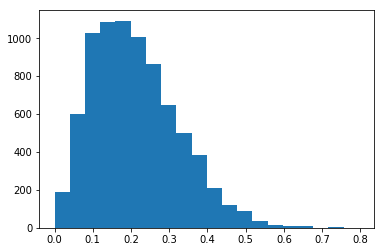

In [13]:
import matplotlib.pyplot as pyplot
pyplot.figure(12)
print(len(day_stats))
pyplot.hist([day[INTENSITY] for day in day_stats if math.exp(day[TOTAL_TIME])], bins=20)

In [15]:
import pandas as pd
INFREQ_TIME = "infreq_time"
data_frame_dict = { key: [] for key in day_stats[0] if "domain_time" not in key and "num_sessions" not in key and "intervention_sessions" not in key}
NUM_GOALS = "num_goals"
data_frame_dict[AVG_GOAL_TIME] = []
data_frame_dict[AVG_FREQ_TIME] = []
data_frame_dict[AVG_INFREQ_TIME] = []
data_frame_dict[NUM_GOALS] = []
data_frame_dict[INFREQ_TIME] = []
# Let's also count up the freq to see if they're roughly equal
field_stats = {}
print(len(day_stats))
for item in day_stats:
    if len(item[FREQ_GOALS]) > 0 and len(item[INFREQ_GOALS]):
        for key in item:
            #if key == 'install_id':
            #  continue
            #print(key)
            if key == INTENSITY: ## REUSING OLD DEFINITION OF INTENISTY    
                data_frame_dict[INTENSITY].append(len(item[FREQ_GOALS])/len(item[GOALS]))
            elif "domain_time" not in key and "num_sessions" not in key and "intervention_sessions" not in key:
                data_frame_dict[key].append((item[key]))
        data_frame_dict[AVG_GOAL_TIME].append(math.log(math.exp(item[GOAL_TIME])/len(item[GOALS])))
        data_frame_dict[AVG_FREQ_TIME].append(math.log(math.exp(item[FREQ_TIME])/len(item[FREQ_GOALS])))
        data_frame_dict[AVG_INFREQ_TIME].append(math.log((math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]))/len(item[INFREQ_GOALS])))
        data_frame_dict[INFREQ_TIME].append(math.log(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME])))
        data_frame_dict[NUM_GOALS].append(len(item[GOALS]))
df = pd.DataFrame(data_frame_dict)
print(df)


#mean([len(item[GOALS]) for item in day_stats])
df.to_csv('effect_freq_time_spent_2018_09_10.csv')

7884
      avg_freq_time  avg_goal_time  avg_infreq_time  \
0          6.761573       6.448256         6.338594   
1          6.882437       6.329275         6.452049   
2          4.997212       4.773506         5.332719   
3          6.719617       6.250458         6.030685   
4          5.758902       5.476464         5.081404   
5          6.820380       6.817831         6.810142   
6          6.859265       6.609349         4.700480   
7          6.397485       6.212105         5.267858   
8          5.357765       7.678696         7.820038   
9          8.888067       7.674850         6.123224   
10         8.749732       7.690743         6.702370   
11         8.807322       7.734559         6.709711   
12         9.914625       8.407021         6.582948   
13         9.971450       9.122754         6.905753   
14         7.910957       7.490306         7.061620   
15         8.521982       7.663173         7.059045   
16         7.703459       7.389317         7.106879   
17   

In [245]:
%%R -i df -w 5 -h 5 --units in -r 200

#install.packages('ez')
#install.packages('lme4')

library(lme4)
#library(sjPlot)
library(lmerTest)
#library(ez)


/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "freq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "infreq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))



Error in library(lmerTest) : there is no package called ‘lmerTest’


/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in library(lmerTest) : there is no package called ‘lmerTest’

  warnings.warn(x, RRuntimeWarning)


In [19]:
#for index, row in df.iterrows():
#  if row['total_time'] > 12:
#    print(row['email_hash'])

In [21]:
%%R -i df -w 5 -h 5 --units in -r 200

nrow(df)

[1] 5051


In [219]:
%%R -i df -w 5 -h 5 --units in -r 200

summary(df)

 avg_freq_time    avg_goal_time    avg_infreq_time   email_hash       
 Min.   : 0.000   Min.   : 1.749   Min.   : 0.000   Length:5051       
 1st Qu.: 6.008   1st Qu.: 6.558   1st Qu.: 6.381   Class :character  
 Median : 6.916   Median : 7.181   Median : 7.182   Mode  :character  
 Mean   : 6.713   Mean   : 7.128   Mean   : 7.059                     
 3rd Qu.: 7.655   3rd Qu.: 7.747   3rd Qu.: 7.900                     
 Max.   :10.430   Max.   :10.150   Max.   :11.340                     
  freq_goals          freq_time        goal_time         goals          
 Length:5051        Min.   : 0.000   Min.   : 3.135   Length:5051       
 Class :character   1st Qu.: 6.685   1st Qu.: 8.114   Class :character  
 Mode  :character   Median : 7.796   Median : 8.794   Mode  :character  
                    Mean   : 7.483   Mean   : 8.678                     
                    3rd Qu.: 8.590   3rd Qu.: 9.375                     
                    Max.   :11.001   Max.   :11.353              

In [220]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(total_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML ['lmerMod']
Formula: total_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 10316

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.1918 -0.4119  0.1348  0.5655  3.8342 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6052   0.7779  
 Residual               0.3451   0.5875  
Number of obs: 5051, groups:  email_hash, 562

Fixed effects:
            Estimate Std. Error t value
(Intercept)  9.71856    0.04396 221.084
intensity    0.09025    0.05137   1.757

Correlation of Fixed Effects:
          (Intr)
intensity -0.595


In [27]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
#results <- lmer(goal_time ~ intensity + (1|email_hash), data = df)
#summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
results <- lm(total_time ~ intensity, data = df)
summary(results)



Call:
lm(formula = total_time ~ intensity, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3446 -0.5447  0.0539  0.6937  2.1409 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.93418    0.03533 281.210   <2e-16 ***
intensity    0.07941    0.06648   1.194    0.232    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8885 on 5049 degrees of freedom
Multiple R-squared:  0.0002825,	Adjusted R-squared:  8.448e-05 
F-statistic: 1.427 on 1 and 5049 DF,  p-value: 0.2324



In [29]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML ['lmerMod']
Formula: goal_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 12745.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.6349 -0.4311  0.0928  0.5865  5.0568 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5939   0.7706  
 Residual               0.5876   0.7666  
Number of obs: 5051, groups:  email_hash, 562

Fixed effects:
            Estimate Std. Error t value
(Intercept)  8.41669    0.04965  169.53
intensity    0.15400    0.06638    2.32

Correlation of Fixed Effects:
          (Intr)
intensity -0.680


In [31]:
%%R -i df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-MOBILE-REDUCED-ALLGOALS

df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML ['lmerMod']
Formula: avg_freq_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 17009.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.3430 -0.4702  0.1175  0.5851  3.3617 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5855   0.7652  
 Residual               1.4740   1.2141  
Number of obs: 5051, groups:  email_hash, 562

Fixed effects:
            Estimate Std. Error t value
(Intercept)  6.07884    0.06565   92.59
intensity    1.03988    0.10265   10.13

Correlation of Fixed Effects:
          (Intr)
intensity -0.791


In [33]:
%%R -i df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-MOBILE-REDUCED-ALLGOALS

df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML ['lmerMod']
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 12026.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.6265 -0.4782  0.0870  0.5724  4.8192 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5687   0.7541  
 Residual               0.5047   0.7104  
Number of obs: 5051, groups:  email_hash, 562

Fixed effects:
            Estimate Std. Error t value
(Intercept)  6.89112    0.04722 145.923
intensity    0.27040    0.06164   4.386

Correlation of Fixed Effects:
          (Intr)
intensity -0.664


In [35]:
%%R -i df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-MOBILE-REDUCED-INFREQGOALS

df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lm(avg_infreq_time ~ intensity, data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)



Call:
lm(formula = avg_infreq_time ~ intensity, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1461 -0.6976  0.1206  0.8294  4.4332 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.50487    0.05158 145.493   <2e-16 ***
intensity   -0.89702    0.09707  -9.241   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.297 on 5049 degrees of freedom
Multiple R-squared:  0.01663,	Adjusted R-squared:  0.01644 
F-statistic:  85.4 on 1 and 5049 DF,  p-value: < 2.2e-16



In [37]:
%%R -i df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-MOBILE-REDUCED-INFREQGOALS

df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_infreq_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML ['lmerMod']
Formula: avg_infreq_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 16007.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.8257 -0.4548  0.1112  0.6027  5.0780 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6546   0.8091  
 Residual               1.1786   1.0856  
Number of obs: 5051, groups:  email_hash, 562

Fixed effects:
            Estimate Std. Error t value
(Intercept)  7.42318    0.06212  119.50
intensity   -0.90728    0.09267   -9.79

Correlation of Fixed Effects:
          (Intr)
intensity -0.756


In [39]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML ['lmerMod']
Formula: avg_freq_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 17009.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.3430 -0.4702  0.1175  0.5851  3.3617 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5855   0.7652  
 Residual               1.4740   1.2141  
Number of obs: 5051, groups:  email_hash, 562

Fixed effects:
            Estimate Std. Error t value
(Intercept)  6.07884    0.06565   92.59
intensity    1.03988    0.10265   10.13

Correlation of Fixed Effects:
          (Intr)
intensity -0.791


In [41]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML ['lmerMod']
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 12026.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.6265 -0.4782  0.0870  0.5724  4.8192 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5687   0.7541  
 Residual               0.5047   0.7104  
Number of obs: 5051, groups:  email_hash, 562

Fixed effects:
            Estimate Std. Error t value
(Intercept)  6.89112    0.04722 145.923
intensity    0.27040    0.06164   4.386

Correlation of Fixed Effects:
          (Intr)
intensity -0.664


In [43]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
#results <- lmer(goal_time ~ intensity + (1|email_hash), data = df)
#summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
results <- lm(goal_time ~ intensity, data = df)
summary(results)



Call:
lm(formula = goal_time ~ intensity, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5059 -0.5672  0.1166  0.6939  2.6520 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.60424    0.04071 211.346   <2e-16 ***
intensity    0.14849    0.07661   1.938   0.0527 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.024 on 5049 degrees of freedom
Multiple R-squared:  0.0007435,	Adjusted R-squared:  0.0005456 
F-statistic: 3.757 on 1 and 5049 DF,  p-value: 0.05265



In [45]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
#results <- lmer(goal_time ~ intensity + (1|email_hash), data = df)
#summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
results <- lm(avg_goal_time ~ intensity, data = df)
summary(results)



Call:
lm(formula = avg_goal_time ~ intensity, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2893 -0.5707  0.0538  0.6107  3.0205 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.94798    0.03872  179.42  < 2e-16 ***
intensity    0.36218    0.07287    4.97 6.91e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9739 on 5049 degrees of freedom
Multiple R-squared:  0.004869,	Adjusted R-squared:  0.004671 
F-statistic:  24.7 on 1 and 5049 DF,  p-value: 6.915e-07



In [47]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ intensity + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: goal_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 12745.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.6349 -0.4311  0.0928  0.5865  5.0568 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5939   0.7706  
 Residual               0.5876   0.7666  
Number of obs: 5051, groups:  email_hash, 562

Fixed effects:
            Estimate Std. Error t value
(Intercept)  8.41669    0.04965  169.53
intensity    0.15400    0.06638    2.32

Correlation of Fixed Effects:
          (Intr)
intensity -0.680


In [49]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: avg_freq_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 17009.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.3430 -0.4702  0.1175  0.5851  3.3617 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5855   0.7652  
 Residual               1.4740   1.2141  
Number of obs: 5051, groups:  email_hash, 562

Fixed effects:
            Estimate Std. Error t value
(Intercept)  6.07884    0.06565   92.59
intensity    1.03988    0.10265   10.13

Correlation of Fixed Effects:
          (Intr)
intensity -0.791


In [51]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_infreq_time ~ intensity + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: avg_infreq_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 16007.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.8257 -0.4548  0.1112  0.6027  5.0780 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6546   0.8091  
 Residual               1.1786   1.0856  
Number of obs: 5051, groups:  email_hash, 562

Fixed effects:
            Estimate Std. Error t value
(Intercept)  7.42318    0.06212  119.50
intensity   -0.90728    0.09267   -9.79

Correlation of Fixed Effects:
          (Intr)
intensity -0.756


In [53]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(unproductive_time ~ intensity + (1|email_hash) + (num_goals), data = df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: unproductive_time ~ intensity + (1 | email_hash) + (num_goals)
   Data: df

REML criterion at convergence: 15485.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.4443 -0.3924  0.0801  0.5127  4.8153 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.1712   1.4735  
 Residual               0.9336   0.9662  
Number of obs: 5051, groups:  email_hash, 562

Fixed effects:
            Estimate Std. Error t value
(Intercept) 7.643789   0.092989  82.201
intensity   0.080876   0.084860   0.953
num_goals   0.123373   0.009944  12.407

Correlation of Fixed Effects:
          (Intr) intnst
intensity -0.483       
num_goals -0.531  0.034


In [55]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_infreq_time ~ avg_freq_time + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: avg_infreq_time ~ avg_freq_time + (1 | email_hash)
   Data: df

REML criterion at convergence: 16105.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.0046 -0.4483  0.1242  0.6030  4.8854 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6636   0.8146  
 Residual               1.2013   1.0960  
Number of obs: 5051, groups:  email_hash, 562

Fixed effects:
              Estimate Std. Error t value
(Intercept)    7.04623    0.09333  75.496
avg_freq_time -0.01255    0.01272  -0.987

Correlation of Fixed Effects:
            (Intr)
avg_freq_tm -0.899


In [57]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does total time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(total_time ~ intensity + (1|num_goals) + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: total_time ~ intensity + (1 | num_goals) + (1 | email_hash)
   Data: df

REML criterion at convergence: 10247.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.2140 -0.4368  0.1253  0.5744  3.6348 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.59747  0.7730  
 num_goals  (Intercept) 0.04059  0.2015  
 Residual               0.33761  0.5810  
Number of obs: 5051, groups:  email_hash, 562; num_goals, 19

Fixed effects:
            Estimate Std. Error t value
(Intercept)  9.91021    0.07125 139.082
intensity    0.08298    0.05147   1.612

Correlation of Fixed Effects:
          (Intr)
intensity -0.380


In [59]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ intensity + (1|email_hash) + (num_goals), data = df)
summary(results)

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "freq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "infreq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))


Linear mixed model fit by REML ['lmerMod']
Formula: goal_time ~ intensity + (1 | email_hash) + (num_goals)
   Data: df

REML criterion at convergence: 12103.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.4930 -0.4708  0.0891  0.5750  4.9123 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5733   0.7572  
 Residual               0.5120   0.7156  
Number of obs: 5051, groups:  email_hash, 562

Fixed effects:
            Estimate Std. Error t value
(Intercept) 7.478463   0.059254 126.210
intensity   0.215951   0.062131   3.476
num_goals   0.186323   0.007065  26.374

Correlation of Fixed Effects:
          (Intr) intnst
intensity -0.555       
num_goals -0.598  0.038


In [61]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(other_time ~ intensity + (1|email_hash) + (num_goals), data = df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: other_time ~ intensity + (1 | email_hash) + (num_goals)
   Data: df

REML criterion at convergence: 13384.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.5786 -0.4464  0.1049  0.5555  3.2931 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 1.248    1.1173  
 Residual               0.625    0.7906  
Number of obs: 5051, groups:  email_hash, 562

Fixed effects:
            Estimate Std. Error t value
(Intercept) 8.883871   0.073457 120.940
intensity   0.206114   0.069298   2.974
num_goals   0.009813   0.008079   1.215

Correlation of Fixed Effects:
          (Intr) intnst
intensity -0.500       
num_goals -0.547  0.035


In [63]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(target_time ~ intensity + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: target_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 20485.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7151 -0.1851 -0.0603  0.0139  4.7037 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.616    1.618   
 Residual               2.735    1.654   
Number of obs: 5051, groups:  email_hash, 562

Fixed effects:
            Estimate Std. Error t value
(Intercept)   0.6776     0.1058   6.408
intensity     0.5238     0.1430   3.662

Correlation of Fixed Effects:
          (Intr)
intensity -0.687


In [65]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(infreq_time ~ intensity + (1|email_hash) + num_goals, data = df)
summary(results)

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "freq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "infreq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))


Linear mixed model fit by REML ['lmerMod']
Formula: infreq_time ~ intensity + (1 | email_hash) + num_goals
   Data: df

REML criterion at convergence: 16764.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.7206 -0.4515  0.1310  0.6083  4.2556 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.7783   0.8822  
 Residual               1.3649   1.1683  
Number of obs: 5051, groups:  email_hash, 562

Fixed effects:
            Estimate Std. Error t value
(Intercept)  7.79982    0.08700   89.66
intensity   -2.11642    0.09989  -21.19
num_goals    0.15736    0.01088   14.46

Correlation of Fixed Effects:
          (Intr) intnst
intensity -0.608       
num_goals -0.635  0.042


735fc385e38dd2166db9fdabff905b4a985c5ebc496708618fe3548dbafd2f8e


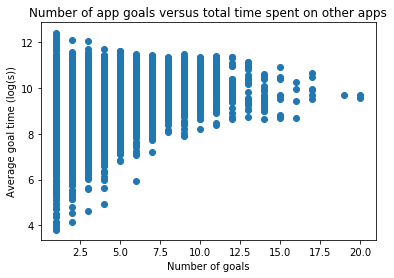

In [67]:
import matplotlib.pyplot as pyplot
import collections

most_active_users = {"": 0}
most_active_user = ""
for stat in day_stats:
    email = stat[HASH]
    if email not in most_active_users:
        most_active_users[email] = 0
    most_active_users[email] += 1
    if most_active_users[email] > most_active_users[most_active_user]:
        most_active_user = email
print(most_active_user)
pyplot.figure(43)
pyplot.title("Number of app goals versus total time spent on other apps")
pyplot.ylabel("Average goal time (log(s))")
pyplot.xlabel("Number of goals")
pyplot.scatter([len(stat[GOALS]) for stat in day_stats], [(stat[TOTAL_TIME]) for stat in day_stats])


In [69]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(other_time ~ intensity +  (1|email_hash) + (1|num_goals), data = df)
summary(results)

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "freq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "infreq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))


Linear mixed model fit by REML ['lmerMod']
Formula: other_time ~ intensity + (1 | email_hash) + (1 | num_goals)
   Data: df

REML criterion at convergence: 13376.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.5151 -0.4507  0.1075  0.5579  3.3630 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 1.246524 1.11648 
 num_goals  (Intercept) 0.002094 0.04576 
 Residual               0.624011 0.78994 
Number of obs: 5051, groups:  email_hash, 562; num_goals, 19

Fixed effects:
            Estimate Std. Error t value
(Intercept)  8.95210    0.06371 140.518
intensity    0.19791    0.06931   2.855

Correlation of Fixed Effects:
          (Intr)
intensity -0.558


In [71]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(target_time ~ avg_goal_time + (1|email_hash), data = df)
summary(results)

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "freq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "infreq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))


Linear mixed model fit by REML ['lmerMod']
Formula: target_time ~ avg_goal_time + (1 | email_hash)
   Data: df

REML criterion at convergence: 20432.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6164 -0.2181 -0.0775  0.0570  4.8684 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.621    1.619   
 Residual               2.701    1.644   
Number of obs: 5051, groups:  email_hash, 562

Fixed effects:
              Estimate Std. Error t value
(Intercept)   -0.96272    0.23959  -4.018
avg_goal_time  0.27103    0.03227   8.399

Correlation of Fixed Effects:
            (Intr)
avg_goal_tm -0.947


In [73]:
# see average change for time spent in goals vs. outside of goal when freq setting changes
goal_change_dict = {"frequency": [], "time": [], "other_time": [], "app": [], "user": []}
from statistics import mean, StatisticsError
goal_time_change_stats = []
other_time_change_stats = []
user_stats = {}
max_time = 0
for day in day_stats:
    email = day[HASH]
    if day[HASH] not in user_stats:
        user_stats[email] = {FREQ_GOALS: set([]), INFREQ_GOALS: set([])}
    user_stats[email][FREQ_GOALS] = user_stats[email][FREQ_GOALS].union(day[FREQ_GOALS])
    user_stats[email][INFREQ_GOALS] = user_stats[email][INFREQ_GOALS].union(day[INFREQ_GOALS])
    for domain_time in day:
        if "_domain_time" in domain_time:
            domain = domain_time[:-len("_domain_time")]
            if domain not in user_stats[email]:
                user_stats[email][domain] = {"frequent_goal": [], "infrequent_goal": [], "frequent_other": [], "infrequent_other": []}
            if not (domain in day[FREQ_GOALS] and domain in day[INFREQ_GOALS]) and day[GOAL_TIME] > day[domain_time]:
                freq = "frequent" if domain in day[FREQ_GOALS] else "infrequent"
                if day[domain_time] > max_time:
                    max_time = day[domain_time]
                    print(max_time)
                user_stats[email][domain][freq + "_goal"].append(math.exp(day[domain_time]))
                user_stats[email][domain][freq + "_other"].append((math.exp(day[GOAL_TIME]) - math.exp(day[domain_time])))
for user in user_stats:
    for domain in user_stats[user][FREQ_GOALS].intersection(user_stats[user][INFREQ_GOALS]):
        if len(user_stats[user][domain]["frequent_goal"])> 0 and len(user_stats[user][domain]["infrequent_goal"]) > 0:
            try:
                mean_freq_goal = mean(user_stats[user][domain]["frequent_goal"])
                # print("frequent" + str(user_stats[user][domain]["frequent_goal"]))
                # print("infrequent  " + str(user_stats[user][domain]["infrequent_goal"]))
                goal_change = mean_freq_goal - mean(user_stats[user][domain]["infrequent_goal"])
                other_change = mean(user_stats[user][domain]["frequent_other"]) - mean(user_stats[user][domain]["infrequent_other"])
                goal_time_change_stats.append(goal_change)
                other_time_change_stats.append(other_change)
            except StatisticsError:
                pass

3.4965075614664802
9.009202900924588
9.914625296946584
10.663124474364906
11.05668271897453
11.340082840810044


1528
0.4869109947643979
[-151.374324673197, 52.149361148481105]


<Container object of 2 artists>

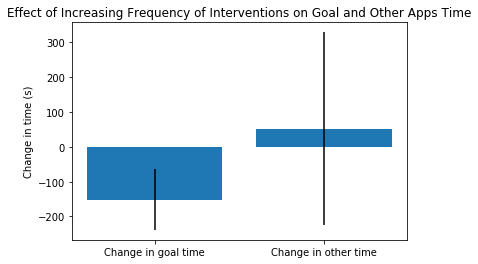

In [75]:
from scipy.stats import sem
pyplot.figure(32)
print(len(goal_time_change_stats))
pyplot.title("Effect of Increasing Frequency of Interventions on Goal and Other Apps Time")
pyplot.ylabel('Change in time (s)')
print(len([stat for stat in other_time_change_stats if stat > 0])/len(goal_time_change_stats))
print([mean(goal_time_change_stats), mean(other_time_change_stats)])
pyplot.bar(["Change in goal time", "Change in other time"], [mean(goal_time_change_stats), mean(other_time_change_stats)] , .8, yerr=[1.96 * sem(goal_time_change_stats), 1.96 * sem(other_time_change_stats)])



In [236]:

import pandas as pd
prev_users= {}
# our next data set: goal_time, freq, goal, and email_hash
goal_stats_dict = {"app": [], "email": [], "time": [], "other_time": [], "frequency": [], 'intensity_day': [], 'intensity_othergoals_day': [], "other_goal_time":[], "avg_other_goal_time": []}
for day in day_stats:
        for key in day:
            if "domain_time" in key:
                domain = key[:-len("_domain_time")]
                if not (domain in day[FREQ_GOALS] and domain in day[INFREQ_GOALS]) and (domain in day[FREQ_GOALS] or domain in day[INFREQ_GOALS]):
                    freq = "frequent" if domain in day[FREQ_GOALS] else "infrequent"
                    if math.exp(day[GOAL_TIME]) - math.exp(day[key]) != 0:
                        goal_stats_dict["intensity_othergoals_day"].append(day[INTENSITY] - day[domain + "_intervention_sessions"]/day["num_sessions"])

                        goal_stats_dict["other_goal_time"].append(math.log(math.exp(day[GOAL_TIME]) - math.exp(day[key])))
                        goal_stats_dict["avg_other_goal_time"].append(math.log(math.exp(goal_stats_dict["other_goal_time"][-1])/len(day[GOALS])))
                        goal_stats_dict["intensity_day"].append(day[INTENSITY])
                        goal_stats_dict["app"].append(domain)
                        goal_stats_dict["email"].append(day[HASH])
                        goal_stats_dict["time"].append(day[key])
                        goal_stats_dict["other_time"].append(math.log(math.exp(day[GOAL_TIME]) - math.exp(day[key])))
                        goal_stats_dict["frequency"].append(freq)
goal_freq_df = pd.DataFrame(goal_stats_dict)
print(goal_freq_df)
#goal_freq_df.to_csv("goal_freq_df.csv")

                                    app  avg_other_goal_time  \
0                    com.android.chrome             6.430794   
1                 com.google.android.gm             7.970049   
2                     com.mattermost.rn             8.064532   
3                  com.linkedin.android             5.462418   
4                   com.twitter.android             4.285883   
5                  com.linkedin.android             6.297109   
6                   com.twitter.android             4.518159   
7                 com.instagram.android             6.250747   
8                   com.twitter.android             5.791793   
9                   com.facebook.katana             6.187031   
10                 com.linkedin.android             6.332213   
11                 com.linkedin.android             4.976734   
12                  com.twitter.android             4.343805   
13                    com.facebook.lite             4.451436   
14                         com.whatsapp 

In [79]:
goal_freq_df.to_csv("2018-09-13-goal_freq_df.csv")

In [237]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-SYMBIOTIC

goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency), data = goal_freq_df)
results <- lmer(time ~ other_goal_time + (frequency) + (1|app), data = goal_freq_df)
summary(results)


Linear mixed model fit by REML ['lmerMod']
Formula: time ~ other_goal_time + (frequency) + (1 | app)
   Data: goal_freq_df

REML criterion at convergence: 44153.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3325 -0.5735  0.1104  0.6649  3.3903 

Random effects:
 Groups   Name        Variance Std.Dev.
 app      (Intercept) 1.415    1.190   
 Residual             2.567    1.602   
Number of obs: 11509, groups:  app, 528

Fixed effects:
                  Estimate Std. Error t value
(Intercept)        4.60826    0.11875   38.81
other_goal_time    0.16271    0.01144   14.23
frequencyfrequent -0.56274    0.03138  -17.93

Correlation of Fixed Effects:
            (Intr) othr__
other_gl_tm -0.812       
frqncyfrqnt -0.175  0.025


In [235]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# DREW GOOD RESULT goodresult RESULT-MOBILE-SYMBIOTIC

goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency), data = goal_freq_df)
results <- lm(other_goal_time ~ frequency + (1|app), data = goal_freq_df)
summary(results)


Call:
lm(formula = other_goal_time ~ frequency, data = goal_freq_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1714 -0.6560  0.2557  0.9470  3.1168 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.17139    0.02813  290.46   <2e-16 ***
frequencyfrequent -0.04708    0.03707   -1.27    0.204    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.405 on 5876 degrees of freedom
Multiple R-squared:  0.0002744,	Adjusted R-squared:  0.0001043 
F-statistic: 1.613 on 1 and 5876 DF,  p-value: 0.2041



In [85]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

goal_freq_df <- subset(goal_freq_df, intensity_othergoals_day != -1)
summary(goal_freq_df)

     app            avg_other_goal_time    email            frequency        
 Length:26370       Min.   :-1.099      Length:26370       Length:26370      
 Class :character   1st Qu.: 6.156      Class :character   Class :character  
 Mode  :character   Median : 6.814      Mode  :character   Mode  :character  
                    Mean   : 6.688                                           
                    3rd Qu.: 7.406                                           
                    Max.   :10.126                                           
 intensity_day      intensity_othergoals_day other_goal_time    other_time    
 Min.   :0.007634   Min.   :0.0000           Min.   : 0.000   Min.   : 0.000  
 1st Qu.:0.156757   1st Qu.:0.1232           1st Qu.: 7.804   1st Qu.: 7.804  
 Median :0.226244   Median :0.1884           Median : 8.607   Median : 8.607  
 Mean   :0.238131   Mean   :0.2022           Mean   : 8.375   Mean   : 8.375  
 3rd Qu.:0.309091   3rd Qu.:0.2683           3rd Qu.: 9.223

In [87]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-SYMBIOTIC

goal_freq_df <- subset(goal_freq_df, intensity_othergoals_day != -1)

# Does non-goal time spent per day on phone inversely depend on goal-time?
goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency), data = goal_freq_df)
results <- lmer(time ~ intensity_othergoals_day + (frequency) + (1|app), data = goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency) + (1|app) + (1|email), data = goal_freq_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: time ~ intensity_othergoals_day + (frequency) + (1 | app)
   Data: goal_freq_df

REML criterion at convergence: 99605.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8197 -0.5538  0.1134  0.6548  3.4468 

Random effects:
 Groups   Name        Variance Std.Dev.
 app      (Intercept) 1.646    1.283   
 Residual             2.464    1.570   
Number of obs: 26370, groups:  app, 598

Fixed effects:
                         Estimate Std. Error t value
(Intercept)               6.30181    0.06737   93.54
intensity_othergoals_day -1.82967    0.09873  -18.53
frequencyfrequent        -0.48741    0.01996  -24.42

Correlation of Fixed Effects:
            (Intr) intn__
intnsty_th_ -0.303       
frqncyfrqnt -0.164 -0.040


In [89]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
goal_freq_df$frequency <- goal_freq_df$frequency == 'frequent'
results <- t.test(goal_freq_df$time ~ goal_freq_df$frequency)
show(results)


	Welch Two Sample t-test

data:  goal_freq_df$time by goal_freq_df$frequency
t = 25.906, df = 25944, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.5133955 0.5974406
sample estimates:
mean in group FALSE  mean in group TRUE 
           6.708798            6.153380 



In [91]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lm(time ~ frequency, data = goal_freq_df)
summary(results)


Call:
lm(formula = time ~ frequency, data = goal_freq_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7088 -1.1100  0.2143  1.2671  4.6769 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.70880    0.01645  407.90   <2e-16 ***
frequencyfrequent -0.55542    0.02185  -25.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.758 on 26368 degrees of freedom
Multiple R-squared:  0.02393,	Adjusted R-squared:  0.02389 
F-statistic: 646.4 on 1 and 26368 DF,  p-value: < 2.2e-16



In [93]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|app) , data = goal_freq_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: time ~ frequency + (1 | app)
   Data: goal_freq_df

REML criterion at convergence: 99943.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.7110 -0.5553  0.1133  0.6581  3.4904 

Random effects:
 Groups   Name        Variance Std.Dev.
 app      (Intercept) 1.656    1.287   
 Residual             2.496    1.580   
Number of obs: 26370, groups:  app, 598

Fixed effects:
                  Estimate Std. Error t value
(Intercept)        5.92395    0.06445   91.91
frequencyfrequent -0.50224    0.02008  -25.02

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.186


In [95]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|app) + (1|email) , data = goal_freq_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: time ~ frequency + (1 | app) + (1 | email)
   Data: goal_freq_df

REML criterion at convergence: 98038.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.1650 -0.5419  0.1158  0.6542  3.7518 

Random effects:
 Groups   Name        Variance Std.Dev.
 app      (Intercept) 1.6691   1.2919  
 email    (Intercept) 0.4021   0.6341  
 Residual             2.2326   1.4942  
Number of obs: 26370, groups:  app, 598; email, 589

Fixed effects:
                  Estimate Std. Error t value
(Intercept)        5.91710    0.07100   83.34
frequencyfrequent -0.46731    0.01972  -23.70

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.162


In [97]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(other_time ~ frequency + (1|app) + (1|email), data = goal_freq_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: other_time ~ frequency + (1 | app) + (1 | email)
   Data: goal_freq_df

REML criterion at convergence: 76287.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.3696 -0.3883  0.1270  0.5604  4.3971 

Random effects:
 Groups   Name        Variance Std.Dev.
 app      (Intercept) 0.1467   0.3831  
 email    (Intercept) 1.2043   1.0974  
 Residual             0.9620   0.9808  
Number of obs: 26370, groups:  app, 598; email, 589

Fixed effects:
                  Estimate Std. Error t value
(Intercept)        7.96770    0.05314 149.936
frequencyfrequent  0.01540    0.01293   1.191

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.143


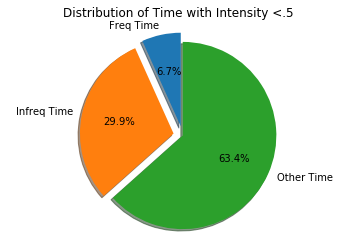

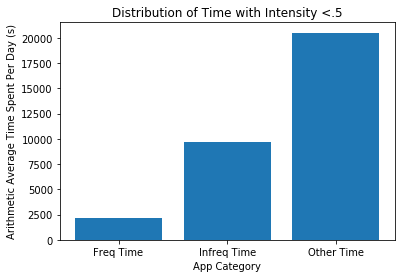

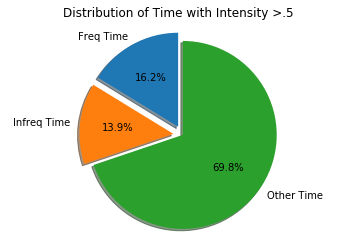

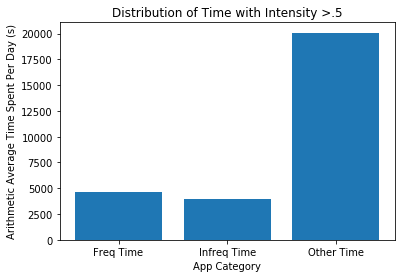

In [99]:

freq_time = [0,0]
infreq_time = [0,0]
other_time = [0,0]
num_days = [0, 0]
for day in day_stats:
    if len(day[FREQ_GOALS]) > 0 and len(day[INFREQ_GOALS]) > 0:
        intensity= len(day[FREQ_GOALS])/len(day[INFREQ_GOALS])
        if intensity <.5:
            num_days[0] += 1
            freq_time[0] += math.exp(day[FREQ_TIME])
            infreq_time[0] += math.exp(day[GOAL_TIME])-math.exp(day[FREQ_TIME])
            other_time[0] += math.exp(day[OTHER_TIME])
        elif intensity > .5:
            num_days[1] += 1
            freq_time[1] += math.exp(day[FREQ_TIME])
            infreq_time[1] += math.exp(day[GOAL_TIME])-math.exp(day[FREQ_TIME])
            other_time[1] += math.exp(day[OTHER_TIME])   
from functools import reduce
import numpy as np
for i in range(0,2):
    pyplot.figure(325 + i * 2 - 1)
    labels = 'Freq Time', 'Infreq Time', 'Other Time'
    sizes = [freq_time[i], infreq_time[i], other_time[i]]
    explode = (0.1, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    pyplot.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    pyplot.title("Distribution of Time with Intensity " + ("<" if i == 0 else ">") + ".5")
    pyplot.figure(325 + i * 2)
    pyplot.title("Distribution of Time with Intensity " + ("<" if i == 0 else ">") + ".5")
    pyplot.xlabel("App Category")
    pyplot.ylabel("Arithmetic Average Time Spent Per Day (s)")
    pyplot.bar(labels, list(map(lambda x: x/num_days[i], sizes)))
    pyplot.figure("Distribution of Time with Intensity")


-0.7511618607603977


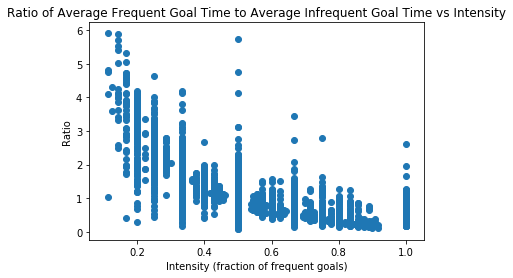

In [101]:
intensities = []
avg_freq_time = []
avg_infreq_time = []
ratio = []
for item in day_stats:
    if len(item[FREQ_GOALS]) > 0 and len(item[INFREQ_GOALS]) > 0 and math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]) > 3:
        avg_freq_time_pt = item[FREQ_TIME]/len(item[FREQ_GOALS])
        
        avg_infreq_time_pt = math.log(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]))/len(item[INFREQ_GOALS])
        if avg_freq_time_pt/avg_infreq_time_pt > 1000:
            print(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]))
            print(math.log(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME])))
            print(math.log(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]))/len(item[INFREQ_GOALS]))
            print(str(avg_freq_time_pt) + " " + str(avg_infreq_time_pt))
        intensity = len(item[FREQ_GOALS])/(len(item[FREQ_GOALS].union(item[INFREQ_GOALS])))
        if avg_freq_time_pt > 0 and avg_infreq_time_pt > 0:
            intensities.append(intensity)
            avg_freq_time.append(avg_freq_time_pt)
            avg_infreq_time.append(avg_infreq_time_pt)
            ratio.append((avg_freq_time_pt/avg_infreq_time_pt))
pyplot.figure(62426)
pyplot.title("Ratio of Average Frequent Goal Time to Average Infrequent Goal Time vs Intensity")
pyplot.xlabel("Intensity (fraction of frequent goals)")
pyplot.ylabel("Ratio")
pyplot.scatter(intensities, ratio)
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(intensities,ratio)
print(r_value)

In [103]:
user_to_install = json.loads(req.urlopen("http://localhost:5001/get_user_to_all_install_ids?user").read().decode("utf-8"))

In [105]:
print(user_to_install)

{'cf70413fe85715ab736d333f': [None], 'c8ade6084f86c3b0129b602d': [None], 'f8a42556cd4ada7cc5f1c67c': [None], 'b2621ff0fa270c69bdb23d21': [None], '71a5c986ecb0690185260a21': [None], '60ad1813dfba47427e8ccdeb': [None], '32be97c9200442a735f74afd': [None], '90322297bc000b106576432e': [None], '088568790f633275a926736c': [None], '8592a26e29e6dc83ff39fdb9': [None], '60a5c8391e1eadfe30796c9b': [None], 'c81167f7975e5f41fbd470f0': [None], 'd2022c6b792604cc53ae0bbf': [None], '92534ea2ca9da88f34aba3ee': [None], 'c1578167a57a817ee6269e05': [None], '63fe884ab73eb33a9cfcc4c5': [None, None], 'a5ced5e20af545f9e1022f7d': [None, None], '324aab5f9ddd9504cbb8223b': [None, None], '0709700f9fab67962cd18780': [None, None], 'e3418c5264dacec8a46b85c8': [None], '46b859e60de86b46b278bd14': [None], 'c7f9593373e5a8f977c5dc96': [None], '525fedbd18bf2d72a442432c': [None], 'c0ca58495c67ea92beba812d': [None], 'd3e259678a40bce2b64e880d': [None], '35d34c7105c8c0f849464244': [None], '4be1207cae1c38d16ad66d21': [None], '11

In [107]:
# Get all browser user ids that have goal frequencies collection.
print ("getting collection names")
collection_names = ext_db.list_collection_names()
print("got collection names")
browser_user_ids = []
counter = 0
for name in collection_names:
    if counter % 100000 == 0:
        print(counter)
    counter += 1
    if "goal_frequencies" in name:
        user = name[:-len("_synced:goal_frequencies")]
        if user in user_to_install and len(user_to_install[user]) == 1:
            browser_user_ids.append(user)

getting collection names
got collection names
0
100000
200000


In [200]:
print('42932100873bd6c4750026a8' in browser_user_ids)

False


In [111]:
from browser_libs import get_session_info_list_for_user

In [113]:
browser_days = []
import moment
import math
from time_utils import epoch_to_date
from datetime import datetime
import time
# Now the browser side of things!!
num_browser_users = len(browser_user_ids)
counter = 0
for user in browser_user_ids:
    # Get freq settings:
    counter += 1
    if int((counter + 1)/num_browser_users * 100) > int(counter/num_browser_users * 100):
        print(str(counter/num_browser_users * 100) + "%")
    user_stats = get_freq_stats(user)
    if len(user_stats) == 0:
        continue
    browser_day_map = {}
    for day_stat in ext_db[user+ "_synced:seconds_on_domain_per_day"].find({"key2":{"$gt": 930}}):
        # The key1 serves as a day. However, if we are going to compare same day stuffs for android.
        # We need to instead build day string from moment
        day = epoch_to_date(int(day_stat['key2']))
        if day not in browser_day_map:
            browser_day_map[day] = {"num_sessions": set([]), "intervention_sessions": set([])}
        goal = get_name(day_stat['key'], BROWSER_DOMAIN)
        if goal:
            if goal + "_domain_time" not in browser_day_map or day_stat["val"] > browser_day_map[day][goal + "_domain_time"]:
                browser_day_map[day][goal + "_domain_time"] = day_stat["val"]
    for intervention_stat in ext_db[user + "_synced:seconds_on_domain_per_session"].find():
        moment_obj = moment.unix(intervention_stat["timestamp_local"])
        date = moment_obj.format("YYYY-MM-DD")
        if date in browser_day_map:
            browser_day_map[date]["num_sessions"].add(intervention_stat["key"] +" " + str(intervention_stat["key2"]))
    
    for intervention_stat in ext_db[user + "_synced:interventions_active_for_domain_and_session"].find():
        if "is_preview_mode" not in intervention_stat or not intervention_stat["is_preview_mode"]:
            moment_obj = moment.unix(intervention_stat["timestamp_local"])
            date = moment_obj.format("YYYY-MM-DD")
            if date in browser_day_map and len(intervention_stat["val"]) > 0:
                browser_day_map[date]["intervention_sessions"].add(intervention_stat["key"] +" " + str(intervention_stat["key2"]))
            
    for day in browser_day_map:
        day_data = { FREQ_TIME: 0, INFREQ_TIME: 0, INTENSITY: 0, INFREQ_GOALS: set([]),  TOTAL_TIME: 0, GOAL_TIME: 0, HASH:user, GOALS: set([]), FREQ_GOALS: set([]), OTHER_TIME: 0, GOAL_TIMES: []}
        # weirdly enough, datetime timestamps are seconds, not ms.
        isoWeek = str(datetime.fromtimestamp(moment.date(day).epoch() + 8 * (60 ** 2)).isocalendar()[1])
        # Add obj and reset data
        # take logs of time cuz time is log-norm distributed
        # First, count up all domain_times into TOTAL, GOAL, and OTHER
        if isoWeek not in user_stats:
            continue
        day_data[FREQ_GOALS] = user_stats[isoWeek][FREQ_GOALS]
        day_data[INFREQ_GOALS] = user_stats[isoWeek][INFREQ_GOALS]
        day_data[GOALS] = day_data[FREQ_GOALS].union(day_data[INFREQ_GOALS])
        if len(user_stats[isoWeek][FREQ_GOALS].intersection(user_stats[isoWeek][INFREQ_GOALS])) > 0:
            continue
        for key in browser_day_map[day]:
            if "_domain_time" in key:
                key_goal = key[:-len("_domain_time")]
                day_data[TOTAL_TIME] += int(browser_day_map[day][key])
                if key_goal in day_data[FREQ_GOALS] or key_goal in day_data[INFREQ_GOALS]:
                    frequent = "frequent" if key_goal in day_data[FREQ_GOALS] else "infrequent"
                    if key_goal in day_data[FREQ_GOALS]:
                        day_data[FREQ_TIME] += browser_day_map[day][key]
                    else:
                        day_data[INFREQ_TIME] += browser_day_map[day][key]
                    day_data[GOAL_TIMES].append({"frequency": frequent, "goal": key_goal, "time": browser_day_map[day][key]})
                    day_data[GOAL_TIME] += browser_day_map[day][key]
                else:
                    day_data[OTHER_TIME] += browser_day_map[day][key]
        for key in day_data:
            if "time" in key and day_data[key] > 0:
                day_data[key]= math.log(day_data[key])
        if len(day_data[FREQ_GOALS]) > 0 and len(day_data[INFREQ_GOALS]) > 0:
            day_data[AVG_FREQ_TIME] = math.log(math.exp(day_data[FREQ_TIME])/len(day_data[FREQ_GOALS]))
            day_data[AVG_INFREQ_TIME] = day_data[INFREQ_TIME]/len(day_data[INFREQ_GOALS])
            for goal_time in day_data[GOAL_TIMES]:
                    if goal_time[TIME] > 0:
                        goal_time[TIME] = math.log(goal_time[TIME])
            if len(day_data[FREQ_GOALS])+ len(day_data[INFREQ_GOALS]) > 0:
                if len(browser_day_map[day]["num_sessions"]) > 0:
                    if len(browser_day_map[day]["num_sessions"]) < len(browser_day_map[day]["intervention_sessions"]):
                        print(user)
                        print(browser_day_map[day]["num_sessions"])
                        print((browser_day_map[day]["intervention_sessions"]))
                        print("")
                    browser_day_map[day]["intervention_sessions"] = browser_day_map[day]["intervention_sessions"].intersection(browser_day_map[day]["num_sessions"])
                    day_data[INTENSITY] = len(browser_day_map[day]["intervention_sessions"])/len(browser_day_map[day]["num_sessions"])
                    browser_days.append(day_data)
                else:
                    #print(day + " " + str(browser_day_map[day]))
                    #print([b for b in ext_db[user + "_logs:goals"].find()][-1]["enabled_goals"])
                    #print("after")
                    pass



0.9411764705882352%
1.9607843137254901%
2.980392156862745%
3.9215686274509802%
4.941176470588235%
5.96078431372549%
7aa307679d508d574906a55b
{'www.youtube.com 61', 'www.youtube.com 86', 'mail.google.com 7', 'www.messenger.com 11', 'www.youtube.com 71', 'www.messenger.com 10', 'www.univers-animeze.net 6', 'www.facebook.com 20', 'www.facebook.com 21', 'www.youtube.com 85', 'www.youtube.com 62', 'www.youtube.com 76', 'www.youtube.com 84'}
{'www.youtube.com 61', 'www.youtube.com 73', 'mail.google.com 7', 'www.youtube.com 79', 'www.youtube.com 64', 'www.youtube.com 69', 'www.youtube.com 82', 'www.youtube.com 83', 'www.youtube.com 84', 'www.youtube.com 71', 'www.youtube.com 80', 'www.facebook.com 20', 'www.facebook.com 21', 'www.youtube.com 66', 'www.youtube.com 68', 'www.youtube.com 63', 'www.youtube.com 75', 'www.youtube.com 62', 'www.youtube.com 70', 'www.youtube.com 86', 'www.youtube.com 81', 'www.youtube.com 74', 'www.youtube.com 72', 'www.youtube.com 77', 'www.youtube.com 65', 'www.you

64.94117647058823%
65.9607843137255%
66.98039215686275%
67.92156862745098%
68.94117647058823%
69.96078431372548%
70.98039215686275%
71.92156862745098%
3b7ed61c6e1724e502607267
{'www.facebook.com 43', 'www.netflix.com 7'}
{'www.facebook.com 43', 'www.netflix.com 7', 'www.youtube.com 44'}

72.94117647058823%
73.9607843137255%
74.98039215686273%
4695deda6b34b39075b78589
{'www.facebook.com 916', 'www.facebook.com 913', 'www.facebook.com 917', 'www.facebook.com 920', 'www.facebook.com 906', 'www.dp24.it 11', 'www.festivaldeiclaustri.it 0', 'www.facebook.com 924', 'www.dp24.it 12', 'www.facebook.com 919', 'www.facebook.com 926', 'www.facebook.com 922', 'www.facebook.com 925', 'www.facebook.com 907', 'm.tuttocalciopuglia.com 8', 'www.facebook.com 921', 'www.facebook.com 918', 'www.facebook.com 914'}
{'www.facebook.com 910', 'www.facebook.com 924', 'www.facebook.com 919', 'www.facebook.com 907', 'www.facebook.com 914', 'www.facebook.com 916', 'www.facebook.com 906', 'www.facebook.com 923', 'ww

In [251]:
import pandas as pd
# Dataframe to find effect of frequency on goal times
prev_users = {}
browser_goal_freq_dict = {HASH: [], TIME: [], GOAL: [], FREQUENCY: [], 'intensity_othergoals_day': [], 'other_goal_time': [], 'avg_other_goal_time': []}
for day in browser_days:
    uhash = day[HASH]
    if uhash not in prev_users:
        prev_users[uhash] = 1
    else:
        prev_users[uhash] += 1
    if prev_users[uhash] > 7:
        total_num_goals = len(day[GOAL_TIMES])
        total_num_othergoals = total_num_goals - 1
        total_num_freq_goals = 0
        for goal_time in day[GOAL_TIMES]:
            if goal_time[FREQUENCY] == 'frequent':
                total_num_freq_goals += 1
        for goal_time in day[GOAL_TIMES]:
            if (math.exp(day[GOAL_TIME]) - math.exp(goal_time[TIME])) != 0:
                browser_goal_freq_dict[HASH].append(day[HASH])
                browser_goal_freq_dict[FREQUENCY].append(goal_time[FREQUENCY])
                browser_goal_freq_dict[TIME].append(goal_time[TIME])
                browser_goal_freq_dict[GOAL].append(goal_time[GOAL])
                browser_goal_freq_dict['other_goal_time'].append(math.log(math.exp(day[GOAL_TIME]) - math.exp(goal_time[TIME])))
                browser_goal_freq_dict['avg_other_goal_time'].append(math.log((math.exp(browser_goal_freq_dict['other_goal_time'][-1])/(len(day[GOALS])- 1))))
                total_num_freq_othergoals = total_num_freq_goals
                if goal_time[FREQUENCY] == 'frequent':
                    total_num_freq_othergoals -= 1
                if total_num_othergoals > 0:
                    intensity_othergoals = total_num_freq_othergoals / total_num_othergoals
                else:
                    intensity_othergoals = -1
                browser_goal_freq_dict['intensity_othergoals_day'].append(intensity_othergoals)

browser_goal_freq_df = pd.DataFrame(browser_goal_freq_dict)
print(browser_goal_freq_df)
browser_goal_freq_df.to_csv("2018-09-10-browser_goal_freq_df.csv")

       avg_other_goal_time                email_hash   frequency       goal  \
0                 1.871802  9aa2418cff3facda9bb90c15  infrequent   facebook   
1                 2.772589  9aa2418cff3facda9bb90c15  infrequent  instagram   
2                 2.442347  9aa2418cff3facda9bb90c15  infrequent   facebook   
3                 3.218876  9aa2418cff3facda9bb90c15  infrequent  instagram   
4                 6.603944  9aa2418cff3facda9bb90c15    frequent    youtube   
5                 6.243196  9aa2418cff3facda9bb90c15  infrequent  instagram   
6                 6.229497  9aa2418cff3facda9bb90c15  infrequent   facebook   
7                 6.121396  9aa2418cff3facda9bb90c15  infrequent   facebook   
8                 6.223568  9aa2418cff3facda9bb90c15  infrequent  instagram   
9                 4.532599  9aa2418cff3facda9bb90c15    frequent    youtube   
10                6.124683  9aa2418cff3facda9bb90c15  infrequent   facebook   
11                5.283204  9aa2418cff3facda9bb90c15

In [117]:
browser_goal_freq_df.to_csv("2018-09-13-browser_goal_freq_df.csv")

In [252]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

library(lme4)
#library(sjPlot)
library(lmerTest)


Error in library(lmerTest) : there is no package called ‘lmerTest’


/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in library(lmerTest) : there is no package called ‘lmerTest’

  warnings.warn(x, RRuntimeWarning)


In [258]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

#browser_goal_freq_df <- subset(browser_goal_freq_df, intensity_othergoals_day != -1)

browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash, ordered=FALSE)
#browser_goal_freq_df <- subset(browser_goal_freq_df, goal == 'youtube' | goal == 'facebook')
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lm(time~  (frequency) , data = browser_goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency), data = browser_goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency) + (1|goal), data = browser_goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency) + (1|email_hash) + (1|goal), data = browser_goal_freq_df)
summary(results)


Call:
lm(formula = time ~ (frequency), data = browser_goal_freq_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9340 -1.0588  0.1958  1.2710  5.1710 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.93397    0.02290 259.167   <2e-16 ***
frequencyfrequent -0.02048    0.03239  -0.632    0.527    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.817 on 12581 degrees of freedom
Multiple R-squared:  3.178e-05,	Adjusted R-squared:  -4.77e-05 
F-statistic: 0.3999 on 1 and 12581 DF,  p-value: 0.5272



In [253]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

#browser_goal_freq_df <- subset(browser_goal_freq_df, intensity_othergoals_day != -1)

browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash, ordered=FALSE)
#browser_goal_freq_df <- subset(browser_goal_freq_df, goal == 'youtube' | goal == 'facebook')
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lm(other_goal_time ~  (frequency) , data = browser_goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency), data = browser_goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency) + (1|goal), data = browser_goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency) + (1|email_hash) + (1|goal), data = browser_goal_freq_df)
summary(results)


Call:
lm(formula = other_goal_time ~ (frequency), data = browser_goal_freq_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2544 -0.7667  0.2783  1.0551  3.8300 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.23267    0.01983 364.704   <2e-16 ***
frequencyfrequent  0.02176    0.02805   0.776    0.438    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.573 on 12581 degrees of freedom
Multiple R-squared:  4.782e-05,	Adjusted R-squared:  -3.166e-05 
F-statistic: 0.6016 on 1 and 12581 DF,  p-value: 0.438



In [257]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

#browser_goal_freq_df <- subset(browser_goal_freq_df, intensity_othergoals_day != -1)

browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
#browser_goal_freq_df <- subset(browser_goal_freq_df, goal == 'youtube' | goal == 'facebook')
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ (frequency) + (1|goal) , data = browser_goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency), data = browser_goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency) + (1|goal), data = browser_goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency) + (1|email_hash) + (1|goal), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: time ~ (frequency) + (1 | goal)
   Data: browser_goal_freq_df

REML criterion at convergence: 49217.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9366 -0.5247  0.1603  0.6786  2.6829 

Random effects:
 Groups   Name        Variance Std.Dev.
 goal     (Intercept) 1.118    1.057   
 Residual             2.817    1.679   
Number of obs: 12583, groups:  goal, 294

Fixed effects:
                  Estimate Std. Error t value
(Intercept)        5.35152    0.07469  71.645
frequencyfrequent -0.02650    0.03089  -0.858

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.209


In [250]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200
## DREW GOOD RESULT BROWSER CONSERVATION
browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
#browser_goal_freq_df <- subset(browser_goal_freq_df, goal == 'youtube' | goal == 'facebook')
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(other_goal_time ~ frequency + (1|goal) , data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: other_goal_time ~ frequency + (1 | goal)
   Data: browser_goal_freq_df

REML criterion at convergence: 40449.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.7417 -0.5130  0.1610  0.6738  2.7564 

Random effects:
 Groups   Name        Variance Std.Dev.
 goal     (Intercept) 0.5307   0.7285  
 Residual             2.4961   1.5799  
Number of obs: 10686, groups:  goal, 407

Fixed effects:
                  Estimate Std. Error t value
(Intercept)        7.35000    0.05398 136.165
frequencyfrequent -0.03086    0.03147  -0.981

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.294


In [127]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
#browser_goal_freq_df <- subset(browser_goal_freq_df, goal == 'youtube')
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|email_hash), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: time ~ frequency + (1 | email_hash)
   Data: browser_goal_freq_df

REML criterion at convergence: 90924.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3453 -0.5490  0.1304  0.6755  3.0310 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6325   0.7953  
 Residual               2.7470   1.6574  
Number of obs: 23269, groups:  email_hash, 849

Fixed effects:
                  Estimate Std. Error t value
(Intercept)        5.92377    0.03391 174.674
frequencyfrequent -0.03780    0.02230  -1.695

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.326


In [129]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
#browser_goal_freq_df <- subset(browser_goal_freq_df, goal == 'facebook')
#browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|email_hash), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: time ~ frequency + (1 | email_hash)
   Data: browser_goal_freq_df

REML criterion at convergence: 90924.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3453 -0.5490  0.1304  0.6755  3.0310 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6325   0.7953  
 Residual               2.7470   1.6574  
Number of obs: 23269, groups:  email_hash, 849

Fixed effects:
                  Estimate Std. Error t value
(Intercept)        5.92377    0.03391 174.674
frequencyfrequent -0.03780    0.02230  -1.695

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.326


In [131]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|email_hash) + (1|goal), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: time ~ frequency + (1 | email_hash) + (1 | goal)
   Data: browser_goal_freq_df

REML criterion at convergence: 89006.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5501 -0.5087  0.1539  0.6668  3.0408 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5719   0.7563  
 goal       (Intercept) 0.9735   0.9866  
 Residual               2.4626   1.5693  
Number of obs: 23269, groups:  email_hash, 849; goal, 425

Fixed effects:
                  Estimate Std. Error t value
(Intercept)        5.47683    0.06720  81.504
frequencyfrequent -0.05174    0.02161  -2.394

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.165


In [133]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-BROWSER-REDUCED: time on site is reduced on days where the goal is frequent

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- browser_goal_freq_df$frequency == 'frequent'
results <- t.test(browser_goal_freq_df$time ~ browser_goal_freq_df$frequency)
show(results)
#summary(browser_goal_freq_df)


	Welch Two Sample t-test

data:  browser_goal_freq_df$time by browser_goal_freq_df$frequency
t = 2.0132, df = 23267, p-value = 0.0441
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.001262606 0.094360920
sample estimates:
mean in group FALSE  mean in group TRUE 
           5.948121            5.900309 



In [135]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-BROWSER-REDUCED: time on site is reduced on days where the goal is frequent

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lm(time ~ frequency, data = browser_goal_freq_df)
summary(results)


Call:
lm(formula = time ~ frequency, data = browser_goal_freq_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9481 -1.0720  0.1887  1.2843  5.2106 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.94812    0.01674 355.283   <2e-16 ***
frequencyfrequent -0.04781    0.02375  -2.013   0.0441 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.811 on 23267 degrees of freedom
Multiple R-squared:  0.0001741,	Adjusted R-squared:  0.0001312 
F-statistic: 4.052 on 1 and 23267 DF,  p-value: 0.04412



In [137]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-BROWSER-REDUCED: time on site is reduced on days where the goal is frequent

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|goal), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: time ~ frequency + (1 | goal)
   Data: browser_goal_freq_df

REML criterion at convergence: 91077

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9036 -0.5396  0.1477  0.6928  2.7111 

Random effects:
 Groups   Name        Variance Std.Dev.
 goal     (Intercept) 0.9923   0.9961  
 Residual             2.8520   1.6888  
Number of obs: 23269, groups:  goal, 425

Fixed effects:
                  Estimate Std. Error t value
(Intercept)        5.39297    0.05959  90.498
frequencyfrequent -0.06066    0.02266  -2.677

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.192


In [139]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-BROWSER-REDUCED: time on site is reduced on days where the goal is frequent

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|email_hash) + (1|goal), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: time ~ frequency + (1 | email_hash) + (1 | goal)
   Data: browser_goal_freq_df

REML criterion at convergence: 89006.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5501 -0.5087  0.1539  0.6668  3.0408 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5719   0.7563  
 goal       (Intercept) 0.9735   0.9866  
 Residual               2.4626   1.5693  
Number of obs: 23269, groups:  email_hash, 849; goal, 425

Fixed effects:
                  Estimate Std. Error t value
(Intercept)        5.47683    0.06720  81.504
frequencyfrequent -0.05174    0.02161  -2.394

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.165


In [141]:
#print(time)

In [143]:
FREQ_FRAC_TIME = "freq_frac_time"
INFREQ_FRAC_TIME = "infreq_frac_time"
AVG_GOAL_TIME= "avg_goal_time"
intensity_dict ={INTENSITY: [], HASH: [], TOTAL_TIME: [], GOAL_TIME: [], OTHER_TIME: [], AVG_GOAL_TIME: [],
                AVG_FREQ_TIME: [], FREQ_FRAC_TIME: [], INFREQ_FRAC_TIME: [], AVG_INFREQ_TIME: [], NUM_FREQ_GOALS: [], NUM_INFREQ_GOALS: [], NUM_GOALS: []}
for day in browser_days:
    for key in intensity_dict:
        if key not in [AVG_GOAL_TIME, NUM_FREQ_GOALS, NUM_INFREQ_GOALS, NUM_GOALS, FREQ_FRAC_TIME, INFREQ_FRAC_TIME]:
            intensity_dict[key].append(day[key])
    intensity_dict[NUM_FREQ_GOALS].append(len(day[FREQ_GOALS]))
    intensity_dict[NUM_INFREQ_GOALS].append(len(day[INFREQ_GOALS]))
    intensity_dict[AVG_GOAL_TIME].append(math.log(math.exp(day[GOAL_TIME])/len(day[GOALS])))
    intensity_dict[NUM_GOALS].append(len(day[FREQ_GOALS].union(day[INFREQ_GOALS])))
    intensity_dict[FREQ_FRAC_TIME].append(math.exp(day[FREQ_TIME])/math.exp(day[TOTAL_TIME]))
    intensity_dict[INFREQ_FRAC_TIME].append(math.exp(day[INFREQ_TIME])/math.exp(day[TOTAL_TIME]))
browser_df = pd.DataFrame(intensity_dict)
browser_df.to_csv("2018-09-10-browser_intensity_on_time.csv")
print(browser_df)

       avg_freq_time  avg_goal_time  avg_infreq_time  \
0           6.188264       5.495117         0.000000   
1           5.996452       5.523459         4.595120   
2           6.270988       5.614951         2.995732   
3           6.042633       5.349486         0.000000   
4           5.929589       5.495117         4.709530   
5           6.050912       5.472271         1.943961   
6           7.673921       6.849702         2.009426   
7           6.702574       5.938064         1.862416   
8          -0.693147      -1.609438         0.000000   
9           6.503539       6.541992         6.614726   
10          8.280838       7.945083         6.345636   
11          4.527209       4.907741         5.398163   
12          7.045777       6.707270         3.587745   
13          5.874931       5.597187         4.574711   
14          0.000000       2.961831         2.030222   
15          7.086738       6.133398         2.615554   
16          0.000000       2.708050         1.90

In [145]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ intensity + (1|email_hash) + (1|num_goals), data = browser_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: goal_time ~ intensity + (1 | email_hash) + (1 | num_goals)
   Data: browser_df

REML criterion at convergence: 49450.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4564 -0.3443  0.1806  0.5525  3.1241 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.955    1.7190  
 num_goals  (Intercept) 0.120    0.3464  
 Residual               3.877    1.9690  
Number of obs: 11313, groups:  email_hash, 986; num_goals, 16

Fixed effects:
            Estimate Std. Error t value
(Intercept)   5.9189     0.1384   42.78
intensity     3.0580     0.1347   22.71

Correlation of Fixed Effects:
          (Intr)
intensity -0.191


In [147]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-FREQGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(avg_freq_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = avg_freq_time ~ intensity, data = browser_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6164 -3.3832  0.9008  2.4409  7.6318 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.38315    0.04094   82.65   <2e-16 ***
intensity    4.15376    0.16417   25.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.078 on 11311 degrees of freedom
Multiple R-squared:  0.05356,	Adjusted R-squared:  0.05348 
F-statistic: 640.2 on 1 and 11311 DF,  p-value: < 2.2e-16



In [149]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-FREQGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: avg_freq_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 54916.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4542 -0.6592  0.1686  0.6741  3.0655 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.428    1.852   
 Residual               6.454    2.540   
Number of obs: 11313, groups:  email_hash, 986

Fixed effects:
            Estimate Std. Error t value
(Intercept)  3.57923    0.07336   48.79
intensity    2.38157    0.17108   13.92

Correlation of Fixed Effects:
          (Intr)
intensity -0.407


In [151]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-INFREQGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(avg_infreq_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = avg_infreq_time ~ intensity, data = browser_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2272 -2.4435 -0.4718  1.3052  8.0723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.44345    0.03348   72.98   <2e-16 ***
intensity    1.78378    0.13428   13.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.518 on 11311 degrees of freedom
Multiple R-squared:  0.01536,	Adjusted R-squared:  0.01527 
F-statistic: 176.5 on 1 and 11311 DF,  p-value: < 2.2e-16



In [153]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-INFREQGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_infreq_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: avg_infreq_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 48571.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8731 -0.5568 -0.0434  0.5035  4.0965 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.302    1.817   
 Residual               3.539    1.881   
Number of obs: 11313, groups:  email_hash, 986

Fixed effects:
            Estimate Std. Error t value
(Intercept)  2.59349    0.06683   38.81
intensity    1.36482    0.12916   10.57

Correlation of Fixed Effects:
          (Intr)
intensity -0.338


In [155]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

summary(browser_df)

 avg_freq_time    avg_goal_time    avg_infreq_time   email_hash       
 Min.   :-2.197   Min.   :-2.890   Min.   : 0.000   Length:11313      
 1st Qu.: 0.000   1st Qu.: 4.295   1st Qu.: 0.000   Class :character  
 Median : 5.124   Median : 5.851   Median : 2.333   Mode  :character  
 Mean   : 4.116   Mean   : 5.108   Mean   : 2.758                     
 3rd Qu.: 6.646   3rd Qu.: 6.882   3rd Qu.: 4.090                     
 Max.   :11.015   Max.   :10.322   Max.   :10.720                     
 freq_frac_time        goal_time      infreq_frac_time      intensity      
 Min.   :0.0000119   Min.   : 0.000   Min.   :0.0000134   Min.   :0.00000  
 1st Qu.:0.0016722   1st Qu.: 5.673   1st Qu.:0.0019724   1st Qu.:0.05128  
 Median :0.0626098   Median : 7.265   Median :0.0677866   Median :0.13333  
 Mean   :0.1608186   Mean   : 6.456   Mean   :0.1655680   Mean   :0.17634  
 3rd Qu.:0.2326169   3rd Qu.: 8.259   3rd Qu.:0.2427817   3rd Qu.:0.25000  
 Max.   :1.0000000   Max.   :11.191   Max.   :1

In [157]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-FREQGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(avg_freq_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = avg_freq_time ~ intensity, data = browser_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6164 -3.3832  0.9008  2.4409  7.6318 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.38315    0.04094   82.65   <2e-16 ***
intensity    4.15376    0.16417   25.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.078 on 11311 degrees of freedom
Multiple R-squared:  0.05356,	Adjusted R-squared:  0.05348 
F-statistic: 640.2 on 1 and 11311 DF,  p-value: < 2.2e-16



In [159]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-INFREQGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(avg_infreq_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = avg_infreq_time ~ intensity, data = browser_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2272 -2.4435 -0.4718  1.3052  8.0723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.44345    0.03348   72.98   <2e-16 ***
intensity    1.78378    0.13428   13.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.518 on 11311 degrees of freedom
Multiple R-squared:  0.01536,	Adjusted R-squared:  0.01527 
F-statistic: 176.5 on 1 and 11311 DF,  p-value: < 2.2e-16



In [161]:
%%R -i browser_df -w 5 -h 5 --units in -r 200


summary(browser_df)

 avg_freq_time    avg_goal_time    avg_infreq_time   email_hash       
 Min.   :-2.197   Min.   :-2.890   Min.   : 0.000   Length:11313      
 1st Qu.: 0.000   1st Qu.: 4.295   1st Qu.: 0.000   Class :character  
 Median : 5.124   Median : 5.851   Median : 2.333   Mode  :character  
 Mean   : 4.116   Mean   : 5.108   Mean   : 2.758                     
 3rd Qu.: 6.646   3rd Qu.: 6.882   3rd Qu.: 4.090                     
 Max.   :11.015   Max.   :10.322   Max.   :10.720                     
 freq_frac_time        goal_time      infreq_frac_time      intensity      
 Min.   :0.0000119   Min.   : 0.000   Min.   :0.0000134   Min.   :0.00000  
 1st Qu.:0.0016722   1st Qu.: 5.673   1st Qu.:0.0019724   1st Qu.:0.05128  
 Median :0.0626098   Median : 7.265   Median :0.0677866   Median :0.13333  
 Mean   :0.1608186   Mean   : 6.456   Mean   :0.1655680   Mean   :0.17634  
 3rd Qu.:0.2326169   3rd Qu.: 8.259   3rd Qu.:0.2427817   3rd Qu.:0.25000  
 Max.   :1.0000000   Max.   :11.191   Max.   :1

In [163]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-ALLGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 49474.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5243 -0.3467  0.1802  0.5526  3.2003 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.016    1.737   
 Residual               3.885    1.971   
Number of obs: 11313, groups:  email_hash, 986

Fixed effects:
            Estimate Std. Error t value
(Intercept)  5.67812    0.06527   86.99
intensity    3.10308    0.13456   23.06

Correlation of Fixed Effects:
          (Intr)
intensity -0.360


In [165]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-ALLGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 49444.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4568 -0.3476  0.1786  0.5537  3.1508 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.996    1.731   
 Residual               3.876    1.969   
Number of obs: 11313, groups:  email_hash, 986

Fixed effects:
            Estimate Std. Error t value
(Intercept)  4.42855    0.06509   68.04
intensity    3.02638    0.13438   22.52

Correlation of Fixed Effects:
          (Intr)
intensity -0.361


In [167]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-ALLGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(avg_goal_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = avg_goal_time ~ intensity, data = browser_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.8150  -0.8816   0.6888   1.6992   6.0307 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.29118    0.03386  126.72   <2e-16 ***
intensity    4.63342    0.13581   34.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.547 on 11311 degrees of freedom
Multiple R-squared:  0.0933,	Adjusted R-squared:  0.09322 
F-statistic:  1164 on 1 and 11311 DF,  p-value: < 2.2e-16



In [169]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-ALLGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(goal_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = goal_time ~ intensity, data = browser_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6454  -0.8196   0.7575   1.6906   5.4553 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.55967    0.03377  164.61   <2e-16 ***
intensity    5.08574    0.13545   37.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.54 on 11311 degrees of freedom
Multiple R-squared:  0.1108,	Adjusted R-squared:  0.1107 
F-statistic:  1410 on 1 and 11311 DF,  p-value: < 2.2e-16



In [171]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-ALLGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(avg_goal_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = avg_goal_time ~ intensity, data = browser_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.8150  -0.8816   0.6888   1.6992   6.0307 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.29118    0.03386  126.72   <2e-16 ***
intensity    4.63342    0.13581   34.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.547 on 11311 degrees of freedom
Multiple R-squared:  0.0933,	Adjusted R-squared:  0.09322 
F-statistic:  1164 on 1 and 11311 DF,  p-value: < 2.2e-16



In [173]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-ALLGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 49444.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4568 -0.3476  0.1786  0.5537  3.1508 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.996    1.731   
 Residual               3.876    1.969   
Number of obs: 11313, groups:  email_hash, 986

Fixed effects:
            Estimate Std. Error t value
(Intercept)  4.42855    0.06509   68.04
intensity    3.02638    0.13438   22.52

Correlation of Fixed Effects:
          (Intr)
intensity -0.361


In [175]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(other_time ~ intensity + (1|email_hash) + (1|num_goals), data = browser_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: other_time ~ intensity + (1 | email_hash) + (1 | num_goals)
   Data: browser_df

REML criterion at convergence: 38650.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.3064 -0.3167  0.1675  0.5443  4.7457 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.89493  0.9460  
 num_goals  (Intercept) 0.02694  0.1641  
 Residual               1.51977  1.2328  
Number of obs: 11313, groups:  email_hash, 986; num_goals, 16

Fixed effects:
            Estimate Std. Error t value
(Intercept)  8.51347    0.07032  121.06
intensity   -3.64819    0.08355  -43.66

Correlation of Fixed Effects:
          (Intr)
intensity -0.229


In [177]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 49444.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4568 -0.3476  0.1786  0.5537  3.1508 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.996    1.731   
 Residual               3.876    1.969   
Number of obs: 11313, groups:  email_hash, 986

Fixed effects:
            Estimate Std. Error t value
(Intercept)  4.42855    0.06509   68.04
intensity    3.02638    0.13438   22.52

Correlation of Fixed Effects:
          (Intr)
intensity -0.361


In [179]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~  intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 49444.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4568 -0.3476  0.1786  0.5537  3.1508 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.996    1.731   
 Residual               3.876    1.969   
Number of obs: 11313, groups:  email_hash, 986

Fixed effects:
            Estimate Std. Error t value
(Intercept)  4.42855    0.06509   68.04
intensity    3.02638    0.13438   22.52

Correlation of Fixed Effects:
          (Intr)
intensity -0.361


In [181]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: avg_freq_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 54916.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4542 -0.6592  0.1686  0.6741  3.0655 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.428    1.852   
 Residual               6.454    2.540   
Number of obs: 11313, groups:  email_hash, 986

Fixed effects:
            Estimate Std. Error t value
(Intercept)  3.57923    0.07336   48.79
intensity    2.38157    0.17108   13.92

Correlation of Fixed Effects:
          (Intr)
intensity -0.407


In [183]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: avg_freq_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 54916.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4542 -0.6592  0.1686  0.6741  3.0655 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.428    1.852   
 Residual               6.454    2.540   
Number of obs: 11313, groups:  email_hash, 986

Fixed effects:
            Estimate Std. Error t value
(Intercept)  3.57923    0.07336   48.79
intensity    2.38157    0.17108   13.92

Correlation of Fixed Effects:
          (Intr)
intensity -0.407


In [185]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_infreq_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: avg_infreq_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 48571.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8731 -0.5568 -0.0434  0.5035  4.0965 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.302    1.817   
 Residual               3.539    1.881   
Number of obs: 11313, groups:  email_hash, 986

Fixed effects:
            Estimate Std. Error t value
(Intercept)  2.59349    0.06683   38.81
intensity    1.36482    0.12916   10.57

Correlation of Fixed Effects:
          (Intr)
intensity -0.338


In [187]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(freq_frac_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: freq_frac_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: -5016.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8348 -0.5085 -0.1770  0.2901  5.1599 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.01118  0.1057  
 Residual               0.03322  0.1823  
Number of obs: 11313, groups:  email_hash, 986

Fixed effects:
            Estimate Std. Error t value
(Intercept) 0.093889   0.004533   20.71
intensity   0.386907   0.012029   32.17

Correlation of Fixed Effects:
          (Intr)
intensity -0.462


In [189]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(infreq_frac_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML ['lmerMod']
Formula: infreq_frac_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: -5104.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0249 -0.5115 -0.1772  0.3199  5.1696 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.01149  0.1072  
 Residual               0.03288  0.1813  
Number of obs: 11313, groups:  email_hash, 986

Fixed effects:
            Estimate Std. Error t value
(Intercept) 0.102036   0.004564   22.36
intensity   0.356455   0.011990   29.73

Correlation of Fixed Effects:
          (Intr)
intensity -0.457


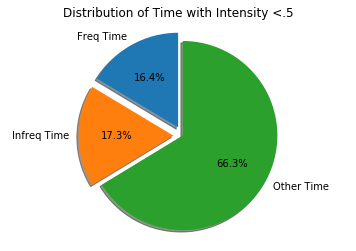

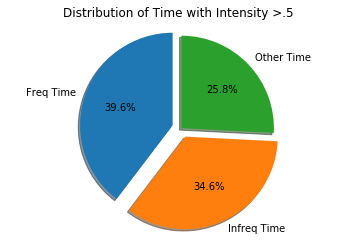

In [190]:

freq_time = [0,0]
infreq_time = [0,0]
other_time = [0,0]
for day in browser_days:
    if day[INTENSITY] <.5:
        freq_time[0] += math.exp(day[FREQ_TIME])
        infreq_time[0] += math.exp(day[INFREQ_TIME])
        other_time[0] += math.exp(day[OTHER_TIME])
    elif day[INTENSITY] > .5:
        freq_time[1] += math.exp(day[FREQ_TIME])
        infreq_time[1] += math.exp(day[INFREQ_TIME])
        other_time[1] += math.exp(day[OTHER_TIME])   
for i in range(0,2):
    pyplot.figure(765 + i)
    labels = 'Freq Time', 'Infreq Time', 'Other Time'
    sizes = [freq_time[i], infreq_time[i], other_time[i]]
    explode = (0.1, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    pyplot.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    pyplot.title("Distribution of Time with Intensity " + ("<" if i == 0 else ">") + ".5")

0.0684972137119849


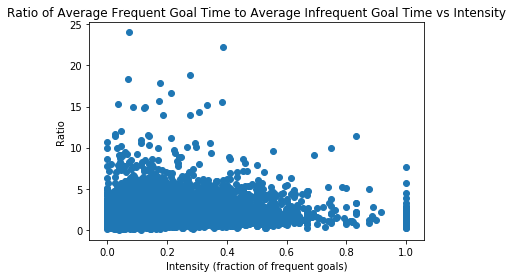

In [191]:
intensities = []
avg_freq_time = []
avg_infreq_time = []
ratio = []
from scipy import stats
for item in browser_days:
    if item[AVG_INFREQ_TIME] > 0 and item[AVG_FREQ_TIME] > 0:
        intensities.append(item[INTENSITY])
        avg_freq_time.append(item[AVG_FREQ_TIME])
        avg_infreq_time.append(item[AVG_INFREQ_TIME])
        ratio.append(item[AVG_FREQ_TIME]/item[AVG_INFREQ_TIME])
pyplot.figure(6246)
pyplot.title("Ratio of Average Frequent Goal Time to Average Infrequent Goal Time vs Intensity")
pyplot.xlabel("Intensity (fraction of frequent goals)")
pyplot.ylabel("Ratio")
pyplot.scatter(intensities, ratio)
slope, intercept, r_value, p_value, std_err = stats.linregress(intensities,ratio)
print(r_value)

<Container object of 2 artists>

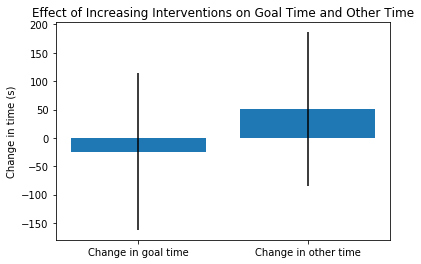

In [192]:
# Now let's try to generate that graph we made for Android -> change in time when goal changes frequency setting
user_goal_freq_avg = {}
for day in browser_days:
    user = day[HASH]
    if user not in user_goal_freq_avg:
        user_goal_freq_avg[user] = {}
    for goal_data in day[GOAL_TIMES]:
        if goal_data['goal'] != "www":
            if goal not in user_goal_freq_avg[user]:
                user_goal_freq_avg[user][goal] = {"time": {"frequent": [], "infrequent": []}, "other": {"frequent": [], "infrequent": []}}
            if (math.exp(day[TOTAL_TIME]) - math.exp(goal_data["time"])) > 0:
                user_goal_freq_avg[user][goal]["time"][goal_data["frequency"]].append(math.exp(goal_data["time"]))
                user_goal_freq_avg[user][goal]["other"][goal_data["frequency"]].append((math.exp(day[GOAL_TIME]) - math.exp(goal_data["time"])))
change_in_goal_time = []
change_in_other_time = []
for user in user_goal_freq_avg:
    for goal in user_goal_freq_avg[user]:
        goal_data = user_goal_freq_avg[user][goal]
        if len(goal_data["time"]["frequent"]) > 0 and len(goal_data["time"]["infrequent"]) > 0:
            mean_freq_time = mean(goal_data["time"]["frequent"])
            mean_infreq_time = mean(goal_data["time"]["infrequent"])
            mean_freq_other = mean(goal_data["other"]["frequent"])
            mean_infreq_other = mean(goal_data["other"]["infrequent"])
            change_in_goal_time.append(mean_freq_time - mean_infreq_time)
            change_in_other_time.append(mean_freq_other - mean_infreq_other)
pyplot.title("Effect of Increasing Interventions on Goal Time and Other Time")
pyplot.ylabel("Change in time (s)")
pyplot.bar(["Change in goal time", "Change in other time"], [(mean(change_in_goal_time)), mean(change_in_other_time)] , .8, yerr=[1.96 * sem(change_in_goal_time), 1.96 * sem(change_in_other_time)])
    

(array([4519., 2930., 1842.,  929.,  435.,  340.,  107.,   41.,   28.,
         142.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

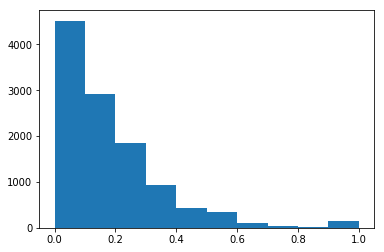

In [193]:
pyplot.figure(123)
pyplot.hist([day[INTENSITY] for day in browser_days])